In [22]:
from os import listdir

mypath="C:\\Users\\reemz\\Desktop\\CaptoStream\\"

In [23]:
# construct the name of the files and the label of each sample
sampleQuater=[]
sampleAccel=[]
sampleBend=[]
sampleLabel=[] 
signs=["sign_0","sign_1","sign_2","sign_3","sign_4","sign_5","sign_6","sign_7","sign_8"]
person = ["_j.csv","_k.csv"]    # the data set is collected by r and k
rep = 10                        # we reapeted every sign 10 times
for s in range(0,len(signs)):
    for p in range(0,len(person)):
        for r in range(1,rep+1):
            sampleQuater.append( "Quaternion_" + signs[s] + "_" + str(r) + person[p])
            sampleAccel.append( "Accel_" + signs[s] + "_" + str(r) + person[p])
            sampleBend.append( "Bending_" + signs[s] + "_" + str(r) + person[p])
            sampleLabel.append(s)
samples=len(sampleQuater)

In [24]:
sampleLabel

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8]

In [25]:
# reading the files and extracting the features of each file 
from pre_utils import spline_coeff
import pandas as pd
import numpy as np
degree=1
# we have 3 dim in quater,3 dim in Accel, and 5 dim in bending(remove 2 fingers). So 11 
dim=11   #it is the number of sensor streams
# the number of coeff (extracted features) from each dim is nk+2. Henc, total of features = (nk+2)*8
nk=6   #number of knots, the larger nk the more fitted spline    (nk+2)*dim
features = (nk)*dim
data = np.zeros(shape=(samples,features))
for s in range(0,samples):
    location = 0  # this index is to iterate in the columns of one row 
    myfile = mypath + sampleQuater[s]
    print(myfile," ",s)
    df1 = pd.read_csv(myfile,sep=";", header=None)
    df2=df1.iloc[:,1:4]
    for col in df2:
        x1=df2[col]
        bs=spline_coeff(x1,nk,degree)
        data[s][location:location+bs.c.shape[0]]=bs.c
        location = location + bs.c.shape[0]

    myfile = mypath + sampleAccel[s]
    print(myfile," ",s)
    df1 = pd.read_csv(myfile,sep=";", header=None)
    df2=df1.iloc[:,1:4]
    for col in df2:
        x1=df2[col]
        bs=spline_coeff(x1,nk,degree)
        data[s][location:location+bs.c.shape[0]]=bs.c
        location = location + bs.c.shape[0]

        
    myfile = mypath + sampleBend[s]
    print(myfile," ",s)
    df1 = pd.read_csv(myfile,sep=";", header=None)
    df2=df1.iloc[:,1:6]    #remove thumb(1) and pinky(5), so take:2,3,4
    for col in df2:
        x1=df2[col]
        bs=spline_coeff(x1,nk,degree)
        data[s][location:location+bs.c.shape[0]]=bs.c
        location = location + bs.c.shape[0]
        

C:\Users\reemz\Desktop\CaptoStream\Quaternion_sign_0_1_j.csv   0
C:\Users\reemz\Desktop\CaptoStream\Accel_sign_0_1_j.csv   0
C:\Users\reemz\Desktop\CaptoStream\Bending_sign_0_1_j.csv   0
C:\Users\reemz\Desktop\CaptoStream\Quaternion_sign_0_2_j.csv   1
C:\Users\reemz\Desktop\CaptoStream\Accel_sign_0_2_j.csv   1
C:\Users\reemz\Desktop\CaptoStream\Bending_sign_0_2_j.csv   1
C:\Users\reemz\Desktop\CaptoStream\Quaternion_sign_0_3_j.csv   2
C:\Users\reemz\Desktop\CaptoStream\Accel_sign_0_3_j.csv   2
C:\Users\reemz\Desktop\CaptoStream\Bending_sign_0_3_j.csv   2
C:\Users\reemz\Desktop\CaptoStream\Quaternion_sign_0_4_j.csv   3
C:\Users\reemz\Desktop\CaptoStream\Accel_sign_0_4_j.csv   3
C:\Users\reemz\Desktop\CaptoStream\Bending_sign_0_4_j.csv   3
C:\Users\reemz\Desktop\CaptoStream\Quaternion_sign_0_5_j.csv   4
C:\Users\reemz\Desktop\CaptoStream\Accel_sign_0_5_j.csv   4
C:\Users\reemz\Desktop\CaptoStream\Bending_sign_0_5_j.csv   4
C:\Users\reemz\Desktop\CaptoStream\Quaternion_sign_0_6_j.csv   5


C:\Users\reemz\Desktop\CaptoStream\Bending_sign_2_7_j.csv   46
C:\Users\reemz\Desktop\CaptoStream\Quaternion_sign_2_8_j.csv   47
C:\Users\reemz\Desktop\CaptoStream\Accel_sign_2_8_j.csv   47
C:\Users\reemz\Desktop\CaptoStream\Bending_sign_2_8_j.csv   47
C:\Users\reemz\Desktop\CaptoStream\Quaternion_sign_2_9_j.csv   48
C:\Users\reemz\Desktop\CaptoStream\Accel_sign_2_9_j.csv   48
C:\Users\reemz\Desktop\CaptoStream\Bending_sign_2_9_j.csv   48
C:\Users\reemz\Desktop\CaptoStream\Quaternion_sign_2_10_j.csv   49
C:\Users\reemz\Desktop\CaptoStream\Accel_sign_2_10_j.csv   49
C:\Users\reemz\Desktop\CaptoStream\Bending_sign_2_10_j.csv   49
C:\Users\reemz\Desktop\CaptoStream\Quaternion_sign_2_1_k.csv   50
C:\Users\reemz\Desktop\CaptoStream\Accel_sign_2_1_k.csv   50
C:\Users\reemz\Desktop\CaptoStream\Bending_sign_2_1_k.csv   50
C:\Users\reemz\Desktop\CaptoStream\Quaternion_sign_2_2_k.csv   51
C:\Users\reemz\Desktop\CaptoStream\Accel_sign_2_2_k.csv   51
C:\Users\reemz\Desktop\CaptoStream\Bending_sign

C:\Users\reemz\Desktop\CaptoStream\Bending_sign_4_7_k.csv   96
C:\Users\reemz\Desktop\CaptoStream\Quaternion_sign_4_8_k.csv   97
C:\Users\reemz\Desktop\CaptoStream\Accel_sign_4_8_k.csv   97
C:\Users\reemz\Desktop\CaptoStream\Bending_sign_4_8_k.csv   97
C:\Users\reemz\Desktop\CaptoStream\Quaternion_sign_4_9_k.csv   98
C:\Users\reemz\Desktop\CaptoStream\Accel_sign_4_9_k.csv   98
C:\Users\reemz\Desktop\CaptoStream\Bending_sign_4_9_k.csv   98
C:\Users\reemz\Desktop\CaptoStream\Quaternion_sign_4_10_k.csv   99
C:\Users\reemz\Desktop\CaptoStream\Accel_sign_4_10_k.csv   99
C:\Users\reemz\Desktop\CaptoStream\Bending_sign_4_10_k.csv   99
C:\Users\reemz\Desktop\CaptoStream\Quaternion_sign_5_1_j.csv   100
C:\Users\reemz\Desktop\CaptoStream\Accel_sign_5_1_j.csv   100
C:\Users\reemz\Desktop\CaptoStream\Bending_sign_5_1_j.csv   100
C:\Users\reemz\Desktop\CaptoStream\Quaternion_sign_5_2_j.csv   101
C:\Users\reemz\Desktop\CaptoStream\Accel_sign_5_2_j.csv   101
C:\Users\reemz\Desktop\CaptoStream\Bending

C:\Users\reemz\Desktop\CaptoStream\Accel_sign_7_6_j.csv   145
C:\Users\reemz\Desktop\CaptoStream\Bending_sign_7_6_j.csv   145
C:\Users\reemz\Desktop\CaptoStream\Quaternion_sign_7_7_j.csv   146
C:\Users\reemz\Desktop\CaptoStream\Accel_sign_7_7_j.csv   146
C:\Users\reemz\Desktop\CaptoStream\Bending_sign_7_7_j.csv   146
C:\Users\reemz\Desktop\CaptoStream\Quaternion_sign_7_8_j.csv   147
C:\Users\reemz\Desktop\CaptoStream\Accel_sign_7_8_j.csv   147
C:\Users\reemz\Desktop\CaptoStream\Bending_sign_7_8_j.csv   147
C:\Users\reemz\Desktop\CaptoStream\Quaternion_sign_7_9_j.csv   148
C:\Users\reemz\Desktop\CaptoStream\Accel_sign_7_9_j.csv   148
C:\Users\reemz\Desktop\CaptoStream\Bending_sign_7_9_j.csv   148
C:\Users\reemz\Desktop\CaptoStream\Quaternion_sign_7_10_j.csv   149
C:\Users\reemz\Desktop\CaptoStream\Accel_sign_7_10_j.csv   149
C:\Users\reemz\Desktop\CaptoStream\Bending_sign_7_10_j.csv   149
C:\Users\reemz\Desktop\CaptoStream\Quaternion_sign_7_1_k.csv   150
C:\Users\reemz\Desktop\CaptoStre

In [26]:
data.shape

(180, 66)

In [27]:
dataset=pd.DataFrame(data)
dataset.insert(len(dataset.columns),"Label",sampleLabel)  # inserting the label as last column

In [28]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,Label
0,0.034483,0.005898,-0.030611,-0.148050,-0.244628,-0.267779,-0.134030,-0.060941,0.008238,0.222481,0.412267,0.465274,0.032422,0.033122,-0.010309,-0.175246,-0.346613,-0.425415,0.176392,0.315216,-0.272841,-0.279316,-0.373925,-0.455114,0.096593,0.187743,-0.192343,-0.263891,-0.433777,-0.580137,0.007254,-0.053377,0.076945,-0.010469,-0.187125,-0.277549,4374.477572,4261.588654,4346.950632,4342.508824,4359.964816,4374.182333,3514.081432,3450.568362,3500.413985,3493.463632,3498.512195,3510.445543,4033.928290,4144.184677,4058.249553,4056.803738,4047.691306,4057.747445,4587.965086,4567.990819,4585.003228,4601.265613,4598.375299,4599.193534,655.079271,4123.638975,3532.185839,3682.401851,3631.553588,3625.364139,0
1,0.332223,0.323170,0.050193,0.179222,0.158988,0.180710,0.026354,-0.055578,-0.003555,0.311212,0.452186,0.534479,-0.375066,-0.179715,-0.077743,-0.295769,-0.347360,-0.400202,-0.168456,0.163566,-0.351595,-0.058437,-0.130492,-0.274488,-0.714338,-0.693519,-0.615576,-0.468366,-0.512938,-0.507649,-0.318334,-0.392546,-0.134138,-0.101965,-0.175934,-0.189989,4379.569059,4412.687598,4403.014549,4408.491737,4390.812787,4395.076632,3465.531680,3408.431164,3486.316604,3492.489931,3497.316195,3508.705985,4063.627922,4030.228854,4065.157405,4073.256027,4082.674354,4090.108555,4601.917804,4550.114047,4603.997701,4614.046033,4628.417733,4624.372499,3584.630231,3750.650345,3678.515754,3672.201626,3665.792481,3650.760262,0
2,0.081684,0.107271,0.206551,0.139995,0.095021,0.100472,0.799514,-0.038133,-0.078772,0.325296,0.546505,0.684196,-0.324972,-0.046712,-0.130265,-0.283038,-0.385439,-0.441161,-0.581418,-0.127144,-0.619923,-0.335491,-0.092076,-0.050380,-0.829323,-0.576637,-0.700026,-0.791376,-0.848718,-0.901285,-0.470642,-0.298521,-0.037215,-0.351386,-0.622353,-0.682502,4366.798213,4381.495692,4367.335218,4356.095907,4358.985692,4342.934556,3508.953599,3417.746638,3470.490641,3482.879432,3494.482278,3483.242465,4056.725461,3958.911533,4058.363400,4055.889242,4072.395677,4075.189034,4615.681464,4569.941048,4590.882813,4598.018141,4614.036087,4617.992282,3532.714955,3752.378324,3665.297973,3668.492635,3665.883689,3660.985274,0
3,0.015479,0.029786,0.302163,0.270639,0.188114,0.170704,0.067687,0.071793,-0.114733,-0.086967,0.220528,0.300960,-0.347023,-0.153470,0.073593,-0.026585,-0.109343,-0.158342,-0.179338,0.263518,-0.127479,-0.286747,-0.010765,-0.170694,-0.909819,-0.608096,-0.497225,-0.541869,-0.507339,-0.604133,-0.438122,-0.429527,0.000430,-0.035336,-0.183920,-0.219554,4381.824992,4441.603719,4379.244065,4357.035382,4337.772985,4347.196532,3527.241692,3580.936054,3516.212203,3509.216689,3497.571168,3485.279035,3964.029204,4031.486294,3969.439111,3959.546881,3955.956705,3983.164757,4395.280952,4418.588997,4453.475969,4466.185729,4475.402341,4474.798423,2056.380326,4149.369604,3486.749665,3628.126186,3620.104626,3651.508636,0
4,-0.037872,-0.008683,0.171424,-0.011066,-0.051841,-0.095174,-0.144958,-0.137778,0.101016,0.466113,0.621042,0.740422,0.384857,0.276756,-0.135065,-0.187421,-0.271412,-0.322958,0.071190,0.448594,-0.328229,-0.103745,-0.338011,-0.325192,-0.704228,-0.357991,-0.544081,-0.582897,-0.759142,-0.834480,-0.310921,-0.261763,0.004940,-0.269583,-0.405392,-0.551773,4375.421146,4391.216561,4317.166916,4320.099428,4309.439860,4310.820394,3486.190513,3492.496476,3486.120923,3495.857674,3501.492498,3490.275615,3913.696542,3911.001744,3972.611170,3981.805018,3993.877386,3996.285048,4612.936725,4648.068817,4585.973116,4573.020143,4560.504397,4564.117469,3586.056853,3605.576914,3541.351424,3533.864655,3524.989223,3526.572549,0
5,-0.064146,-0.020057,0.362332,0.189861,0.151955,0.152075,0.771721,0.421778,-0.198068,0.160977,0.274164,0.361146,-0.564301,-0.293980,0.140238,-0.063941,-0.076741,-0.110365,-0.066711,0.302547,-0.325569,-0.018792,-0.078392,-0.136215,-0.947784,-0.

In [29]:
sampleBend[10]

'Bending_sign_0_1_k.csv'

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 67 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       180 non-null    float64
 1   1       180 non-null    float64
 2   2       180 non-null    float64
 3   3       180 non-null    float64
 4   4       180 non-null    float64
 5   5       180 non-null    float64
 6   6       180 non-null    float64
 7   7       180 non-null    float64
 8   8       180 non-null    float64
 9   9       180 non-null    float64
 10  10      180 non-null    float64
 11  11      180 non-null    float64
 12  12      180 non-null    float64
 13  13      180 non-null    float64
 14  14      180 non-null    float64
 15  15      180 non-null    float64
 16  16      180 non-null    float64
 17  17      180 non-null    float64
 18  18      180 non-null    float64
 19  19      180 non-null    float64
 20  20      180 non-null    float64
 21  21      180 non-null    float64
 22  22

In [31]:
dataset.to_csv('dataset_all.csv',index=False)

In [34]:
from pickle import dump, load

# 88 used to be 72, changed because of an error
temp=dataset.iloc[10,0:66]
scalerName = 'C:\\Users\\reemz\\Desktop\\SeniorProject - Copy\\newspmodel\\scaler.pkl'
scaler = load(open(scalerName, 'rb'))
scaled=scaler.transform([temp])  #scaled is numby array
temp = pd.DataFrame(scaled) 
temp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65
0,0.015833,0.19694,0.144443,0.174107,0.197752,0.20102,-1.322799,-1.835781,-2.479627,-2.14501,-1.76961,-1.544222,2.749437,3.364554,4.840551,4.993968,5.023147,4.804233,-0.657703,-0.448248,-0.276057,-0.373511,-0.402353,-0.3332,0.267861,0.33997,0.357327,0.364985,0.331175,0.320271,0.641786,0.348962,0.551815,0.434284,0.430359,0.409983,0.681762,0.888376,0.974817,1.0224,1.120375,1.277065,-3.264814,-0.753121,-0.458034,-0.213245,-0.290586,-0.296646,0.187408,0.587799,0.600029,0.593727,0.481286,0.392365,0.905921,1.336502,1.577514,1.768913,1.548029,1.191172,0.939537,1.007175,1.356417,1.761988,1.557383,1.073558


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>],
       [<AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>],
       [<AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>],
       [<AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>],
       [<AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSub

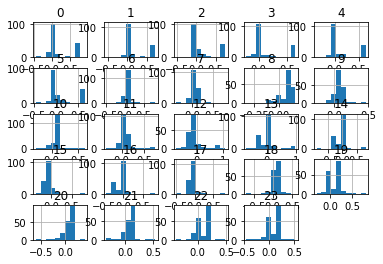

In [35]:
dataset.iloc[:,0:24].hist()